In [1]:
#importing libraries
import os
import random
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D , MaxPool2D, Flatten, Dense
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


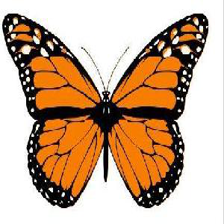

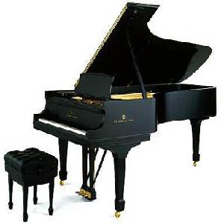

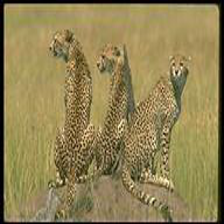

In [15]:
img = Image.open("/content/drive/My Drive/Colab Notebooks/caltech-101/train/butterfly/image_0001.jpg")
img = img.resize((224,224))
butterfly = np.asarray(img)
img.show()

img = Image.open("/content/drive/My Drive/Colab Notebooks/caltech-101/train/grand_piano/image_0002.jpg")
img = img.resize((224,224))
piano = np.asarray(img)
img.show()

img = Image.open("/content/drive/My Drive/Colab Notebooks/caltech-101/train/Leopards/image_0004.jpg")
img = img.resize((224,224))
leopard = np.asarray(img)
img.show()

In [3]:
#preparing the data
def getdata(folder):
    classes = ["butterfly", "grand_piano", "Leopards"]
    data = []

    for k in range(3):
        for i in os.listdir(f"/content/drive/My Drive/Colab Notebooks/caltech-101/{folder}/{classes[k]}"):
            if i.endswith(".jpg"):
                image = Image.open(f"/content/drive/My Drive/Colab Notebooks/caltech-101/{folder}/{classes[k]}/{i}")
                img = image.resize((224,224))
                img = np.asarray(img)
                label = np.array([0, 0, 0])
                label[k] = 1
                img = np.array([img, label])
                data.append(img)

    random.shuffle(data)
    return np.array(data)

In [4]:
train = getdata("train")
val = getdata("val")
test = getdata("test")

<ipython-input-3-dad3ae876d77>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img = np.array([img, label])


In [5]:
def extract(data):
    xtrain = []
    ytrain = []
    for i in range(len(data)):
        if(len(data[i][0].shape)==3):
            xtrain.append(data[i][0])
            ytrain.append(data[i][1])

    return np.array(xtrain), np.array(ytrain)

In [6]:
xtrain, ytrain = extract(train)
xval, yval = extract(val)
xtest, ytest = extract(test)

In [7]:
model = Sequential([
	Conv2D(32,3,padding="valid", activation="relu", input_shape=(224,224,3), strides=1, kernel_initializer="he_normal"),
	Conv2D(64,3,padding="valid", activation="relu", strides=1, kernel_initializer="he_normal"),
	MaxPool2D(pool_size=(2, 2), strides=1, padding="valid"),
	Flatten(),
	Dense(128, activation='relu'),
	Dense(3, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 219, 219, 64)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3069504)           0         
                                                                 
 dense (Dense)               (None, 128)               392896640 
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

For min_delta values greater than 1E-4, the model is overfitting on training data, and below that, it is not not getting trained (underfitting).

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=1E-4, verbose=2, patience=3)
out = model.fit(xtrain, ytrain, validation_data=(xval, yval), epochs=50, callbacks=[es])

Epoch 1/50
5/5 [==============================] - 12s 230ms/step - loss: 219379.9219 - accuracy: 0.3288 - val_loss: 47343.2695 - val_accuracy: 0.5667
Epoch 2/50
5/5 [==============================] - 0s 62ms/step - loss: 42914.4453 - accuracy: 0.4726 - val_loss: 1525.1991 - val_accuracy: 0.8333
Epoch 3/50
5/5 [==============================] - 0s 60ms/step - loss: 6432.3340 - accuracy: 0.6233 - val_loss: 7697.6138 - val_accuracy: 0.4667
Epoch 4/50
5/5 [==============================] - 0s 59ms/step - loss: 4840.7339 - accuracy: 0.5479 - val_loss: 921.7364 - val_accuracy: 0.5333
Epoch 5/50
5/5 [==============================] - 0s 60ms/step - loss: 107.9178 - accuracy: 0.9589 - val_loss: 211.1031 - val_accuracy: 0.8000
Epoch 6/50
5/5 [==============================] - 0s 60ms/step - loss: 147.5170 - accuracy: 0.9795 - val_loss: 656.2039 - val_accuracy: 0.7667
Epoch 7/50
5/5 [==============================] - 0s 60ms/step - loss: 122.0760 - accuracy: 0.9726 - val_loss: 508.7145 - val_acc

In [9]:
trainpred = model.predict(xtest)
trainpred = np.rint(trainpred)
print("Test Accuracy:", accuracy_score(ytest, trainpred))

2/2 [==============================] - 0s 210ms/step
Test Accuracy: 0.9152542372881356


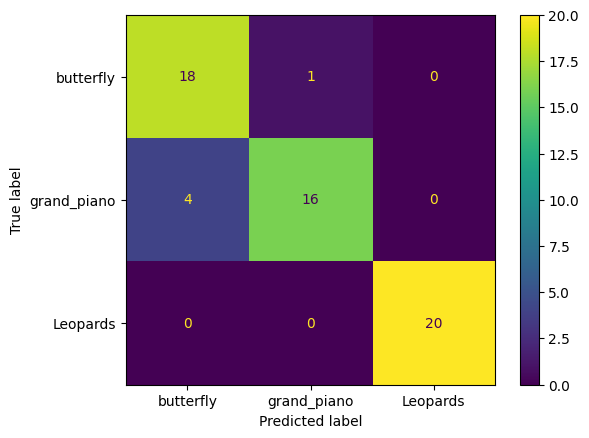

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ["butterfly", "grand_piano", "Leopards"]
disp = ConfusionMatrixDisplay(confusion_matrix(tf.argmax(ytest, axis=1), tf.argmax(trainpred, axis=1)), display_labels=classes)
disp.plot()
plt.show()